# 머신러닝 3장 회귀 알고리즘과 모델 규제

# k-최근접 이웃 회귀

In [1]:
# 회귀(Regression)
## 지도 학습(Supervised Learning)
### 훈련을 위한 데이터(training data)와 정답이 필요
# - 훈련 데이터 = 입력(input) + 정답(target)
### 알고리즘이 정답을 맞추는지 학습

## 분류
# - 테스트 세트의 샘플을 정확하게 분류한 개수의 비율: 정확도
# -정답을 맞힌 개수의 비율 (정확도)

## 회귀
# - 두 변수 사이의 상관 관계를 분석하는 방법
# - 기존 데이터를 이용해서 임의의 숫자를 예측하는 문제: 결정계수(R2)
# - 정확한 숫자를 맞춘다는 것은 불가능
# - Example
# 내년 경제 성장률 예측
# 배달 도착 시간 예측
# 농어의 무게 예측

In [2]:
# K-최근접 이웃 회귀
## k-최근접 이웃 분류(2장)
### 예측하려는 샘플에 가장 가까운 이웃을 k개를 선택
### 이웃들의 클래스를 확인
### 샘플 주변의 다수의 클래스를 샘플의 클래스로 예측 ###

## k-최근접 이웃 회귀
### 예측하려는 샘플에 가장 가까운 이웃 k개를 선택
### 이웃의 평균을 구함 ###

In [3]:
# 농어(perch)의 길이로 무게를 잘 예측할 수 있을까?
import numpy as np
import matplotlib.pyplot as plt

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
                         21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
                         22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
                         27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
                         36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
                         40.0, 42.0, 43.0, 43.0, 43.5, 44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
                         110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
                         150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0, 218.0,
                         300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0, 556.0, 840.0,
                         685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0, 850.0, 900.0, 1015.0,
                         820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0])

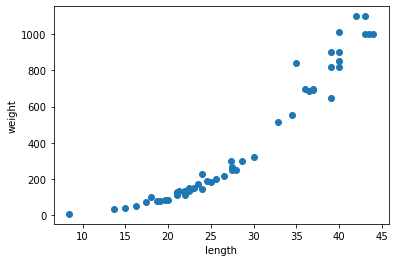

In [4]:
# 산점도 확인
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [10]:
# 훈련 세트와 테스트 세트 준비
# train_test_split() 함수 사용
## 1개의 데이터 세트(perch_length)만 사용

# scikit-learn의 훈련 세트는 2차원 배열을 사용
## 입력 데이터 세트를 2차원 배열 형태로 변경이 필요
## reshape(row, col) 함수 사용
## (42,) -> (42, 1)형태로 변경

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
perch_length, perch_weight, random_state=42)

print(train_input.shape, test_input.shape)
# reshape(-1, 1): -1: 행의 크기를 자동 지정
train_input = train_input.reshape(-1, 1) # 2차원 배열로 변경
test_input = test_input.reshape(-1, 1) # 2차원 배열로 변경

print(train_input.shape, test_input.shape)

(42,) (14,)
(42, 1) (14, 1)


In [8]:
### k-최근접 이웃 회귀 알고리즘 ###
## KNeighborsRegressor 클래스 사용
# - n_neighbors: 기본 값=5

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
# 모델 훈련
knr.fit(train_input, train_target)

# score(): 훈련 모델 점수 확인, 결정 계수(R2)를 리턴
print(knr.score(test_input, test_target))  # 검증용 데이터로 모델 평가

#score()
# – 결정 계수(R2)를 리턴함
# – 출력하는 값이 높을수록 정확도가 높음

0.992809406101064


In [11]:
# 결정 계수 (R2) 값
## 회귀식이 얼마나 정확한지를 나타내는 숫자 (0 ≤ R2 ≤ 1))
# - 0에 가까울수록, 회귀식의 정확도는 낮음
# - 1에 가까울수록, 회귀식의 정확도는 높음

In [12]:
# mean_absolut_error                            # p.10
# mean_absolut_error (MAE) : 평균 절대 오차
## 타깃(실제 값)과 예측 값의 절대값 오차 평균

## 절대값을 사용: 에러의 크기를 반영
## sklearn.merics 패키지 포함
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측값 계산
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절대 오차 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae) # 19g 정도의 오차 발생

19.157142857142862


In [14]:
# 과대적합 vs 과소적합
# 과대적합(overfitting)
## 훈련 세트에만 잘 맞는 모델
# - 테스트 세트에서는 점수가 굉장히 나쁨
# - 일반성이 떨어짐

# 과소적합(underfitting)
## 훈련 세트보다 테스트 세트의 점수가 높거나,
## 훈련 세트와 테스트 세트의 두 점수가 모두 낮음
# - 모델이 너무 단순해서 훈련 세트로 훈련이 되지 않은 경우

# 앞 예제에서 훈련 세트와 테스트 세트의 score() 비교
## 테스트 세트의 점수가 더 높음: 과소 적합(underfitting)

# 테스트 세트를 사용하여 R2값 계산
print(knr.score(test_input, test_target))

# 훈련 세트 R2값 계산
print(knr.score(train_input, train_target))

0.992809406101064
0.9698823289099254


In [15]:
### 모델 개선: 이웃 개수 줄이기 ###
# 과소 적합 해결 방안: 이웃의 개수 줄임
## 기본 값 5에서 n_neighbors = 3으로 변경
# - 모델이 더 복잡해짐
# - 훈련 세트의 국지적 패턴에 더 민감해짐

knr.n_neighbors = 3

# 모델을 다시 훈련
knr.fit(train_input, train_target)

print("훈련 데이터로 모델의 정확도 점수 계산: ",
      knr.score(train_input, train_target))

print("테스트 데이터로 모델의 정확도 점수 계산: ",
      knr.score(test_input, test_target))

훈련 데이터로 모델의 정확도 점수 계산:  0.9804899950518966
테스트 데이터로 모델의 정확도 점수 계산:  0.9746459963987609


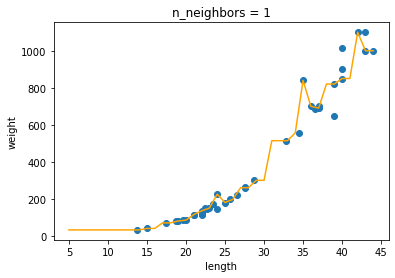

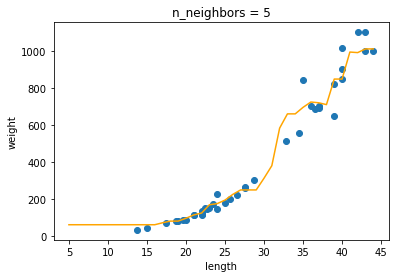

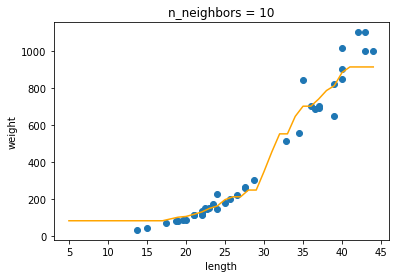

In [18]:
# 이웃의 수에 따른 그래프 비교
## k-최근접 회귀 알고리즘에서 이웃의 수 변경: 1, 5, 10
### 농어의 길이를 5~45까지 변경하면서 무게 예측

# k-최근접 이웃 회귀 객체 생성
knr = KNeighborsRegressor()

# x:농어의 길이(5~45까지 범위 설정)
x = np.arange(5, 45).reshape(-1, 1)
# n=1, 5, 10일때 예측 결과 그래프
for n in [1, 5, 10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    
    # 지정한 범위 x(농어의 길이)에 대한 농어 무게 예측하기
    prediction = knr.predict(x)
    
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target, label='train set')
    plt.plot(x, prediction, label='prediction', color='orange')
    
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

# 마무리 정리
## 회귀(Regression)
- 임의의 수치를 예측하는 문제
- k-최근접 이웃 회귀
 - 가장 가까운 이웃 샘플을 찾고 타깃값을 평균하여 예측
 
## 과대 적합(Overfitting)
- 훈련 세트에만 잘 맞음 (일반성이 떨어짐)
- 훈련 세트의 성능 > 테스트 세트 성능

## 과소 적합(Underfitting)
- 모델이 단순하여 훈련세트의 패턴을 모두 잡아내지 못함
- 훈련 세트와 테스트 세트의 성능이 모두 낮거나
- 훈련 세트의 성능 < 테스트 세트의 성능

In [19]:
##################################################

# 선형 회귀

In [20]:
# k- 최근접 이웃 알고리즘의 문제점
## 가장 가까운 샘플을 찾아 평균값 계산
## 새로운 샘플이 훈련 세트의 범위를 벗어나면 잘못된 예측을 함
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
                         21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
                         22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
                         27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
                         36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
                         40.0, 42.0, 43.0, 43.0, 43.5, 44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
                         110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
                         150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0, 218.0,
                         300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0, 556.0, 840.0,
                         685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0, 850.0, 900.0, 1015.0,
                         820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0])

In [21]:
# 훈련 세트 밖의 샘플 예측
## 50cm, 100cm 길이의 농어 무게 예측: 동일한 예측값
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(
perch_length, perch_weight, random_state=42)

# 훈련 세트와 테스트 세트를 2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)

print('50cm:', knr.predict([[50]]))           # 100cm 농어의 예측값은
print('100cm:', knr.predict([[100]]))         # 50cm 농어의 예측값과
                                              # 동일: 1033g

50cm: [1033.33333333]
100cm: [1033.33333333]


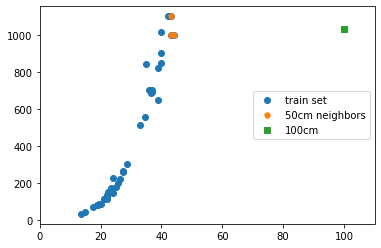

In [25]:
### 50cm, 100cm 길이의 농어의 이웃 및 산점도 비교 ###

# 50cm 농어의 이웃을 구함
distances_50, indexes_50 = knr.kneighbors([[50]])
# 100cm 농어의 이웃을 구함
distances_100, indexes_100 = knr.kneighbors([[100]])

# 훈련 세트의 산점도
plt.scatter(train_input, train_target, label='train set')

# 훈련 세트 중에서 50cm 농어의 이웃 데이터만 다시 그림
plt.scatter(train_input[indexes_50], train_target[indexes_50],
           marker='p', label='50cm neighbors')
# 100cm 농어 데이터
plt.scatter(100, 1033, marker='s', label='100cm')

plt.xlim(0, 110)
plt.legend(loc=5)
plt.show()

In [27]:
### 50cm 농어와 100cm 농어의 이웃 비교
# 훈련데이터에서 이웃 데이터의 인덱스 확인
print('50cm neighbor indexes:', indexes_50)
print('100cm neighbor indexes:', indexes_100)

print('--------------------------------------')
# 이웃 데이터의 무게 평균 계산
print(np.mean(train_target[indexes_50]))
print(np.mean(train_target[indexes_100]))

50cm neighbor indexes: [[34  8 14]]
100cm neighbor indexes: [[34  8 14]]
--------------------------------------
1033.3333333333333
1033.3333333333333
